# Walmart Sales Forecast

In [1]:
import os
os.chdir('../')
%pwd

'C:\\Users\\VICTUS\\Documents\\machine-learning-projects'

In [2]:
import pandas as pd
import numpy as np

pd.options.display.max_columns=100

In [3]:
features = pd.read_csv("datasets/WalmartSalesForecast/features.csv")
stores = pd.read_csv("datasets/WalmartSalesForecast/stores.csv")
df = pd.read_csv("datasets/WalmartSalesForecast/train.csv")

In [4]:
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [5]:
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [6]:
stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [7]:
# merging 3 different sets
df = df.merge(features, on=['Store', 'Date'], how='inner').merge(stores, on=['Store'], how='inner')
df.head(5)

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
1,1,2,2010-02-05,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
2,1,3,2010-02-05,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
3,1,4,2010-02-05,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
4,1,5,2010-02-05,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315


In [8]:
df.columns

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday_x', 'Temperature',
       'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5', 'CPI', 'Unemployment', 'IsHoliday_y', 'Type', 'Size'],
      dtype='object')

In [9]:
df.drop(['IsHoliday_y', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4','MarkDown5'], axis=1,inplace=True) # removing dublicated column
df.rename(columns={'IsHoliday_x':'IsHoliday'},inplace=True) # rename the column
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,211.096358,8.106,A,151315
1,1,2,2010-02-05,50605.27,False,42.31,2.572,211.096358,8.106,A,151315
2,1,3,2010-02-05,13740.12,False,42.31,2.572,211.096358,8.106,A,151315
3,1,4,2010-02-05,39954.04,False,42.31,2.572,211.096358,8.106,A,151315
4,1,5,2010-02-05,32229.38,False,42.31,2.572,211.096358,8.106,A,151315


In [10]:
store_dept_table = pd.pivot_table(df, index='Store', columns='Dept', values='Weekly_Sales', aggfunc=np.mean)
display(store_dept_table)

Dept,1,2,3,4,5,6,7,8,9,10,11,12,13,14,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,54,55,56,58,59,60,65,67,71,72,74,77,78,79,80,81,82,83,85,87,90,91,92,93,94,95,96,97,98,99
Store,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,22513.322937,46102.090420,13150.478042,36964.154476,24257.941119,4801.780140,24566.487413,35718.257622,28062.052238,31033.386364,24919.270629,10566.545315,38692.880490,15268.550909,24151.061329,9196.557902,7765.304425,1259.018531,4091.571538,7808.450559,8052.076154,21623.184685,6187.389720,10152.336783,6767.997273,1374.649650,593.113986,4651.040210,3415.295035,2408.533287,8202.668392,5946.431189,11530.831678,2535.730909,1476.203566,2800.495105,79978.222587,NaN,58510.409161,1064.769650,7940.326224,NaN,4872.724406,23.995070,19662.989860,-116.454545,917.727920,11437.931259,NaN,32.712727,2355.439371,90.921053,12817.843357,4000.480629,3372.474476,857.775105,1020.995804,NaN,7436.017343,2732.473357,47390.644895,11652.827413,677.000000,11.500000,33974.792937,17139.314615,29780.696573,20727.860909,5704.048951,3685.875524,46006.277203,82427.547832,64238.943427,135458.969510,71699.182378,63180.568182,120772.062168,33251.831639,35207.348811,11827.770769,306.091081
2,30777.980769,65912.922517,17476.563357,45607.666573,30555.315315,6808.382517,40477.837063,58707.369441,34375.864476,38845.854476,23382.686154,7735.946294,46117.959231,21314.132937,27005.179650,13790.854196,11687.563009,4053.439930,5748.619441,9910.939860,12923.013846,29170.616573,8309.564545,15299.508392,9347.725105,1837.954615,798.913217,7111.482657,4981.155385,3884.756993,11755.096713,7488.096993,17595.203497,3875.588601,2631.750559,4500.250769,85114.996014,2.340000,78174.560210,2592.220769,8768.857692,NaN,7245.541189,29.139848,29675.324545,18.068182,1358.347914,15568.465664,NaN,16.226667,4148.373566,104.502868,13060.297692,5545.122308,21610.019091,1391.520559,221.545946,NaN,12125.255594,4634.609371,72929.496643,16986.406014,817.500000,11.764000,32759.096993,26041.273566,31000.484266,24647.232587,5710.719650,3672.042797,24932.985804,97611.537133,80610.380350,164840.230979,70581.977063,70018.672517,143588.751888,34319.063846,40697.204056,14035.400839,475.896905
3,7328.621049,16841.775664,5509.300769,8434.186503,11695.366573,2012.411818,10044.341608,8310.254196,9062.007692,10871.944126,8774.928042,2383.603007,11363.061678,4626.649021,7871.568322,2634.199650,2960.677739,731.313147,1682.199231,1244.529650,3101.769860,10913.330070,2763.627343,4260.447972,2850.050839,500.193636,166.870070,1517.404056,1243.926993,878.475455,4296.111049,3228.155105,4579.719161,1439.325524,622.689371,NaN,108598.364126,NaN,18203.108252,646.832028,4422.944406,NaN,2133.657762,9.922500,6179.259510,38.875000,NaN,17.581481,NaN,5.411803,961.390210,58.311239,7153.737902,1606.808881,NaN,244.878455,138.125874,NaN,2021.482657,1101.610000,22796.856573,3374.960769,424.000000,6.000000,7230.372448,24.420476,1429.300070,6746.578392,19.330000,874.128182,939.435455,1540.049161,318.685594,7568.280210,NaN,656.294444,15745.528252,3934.540000,343.437357,30.570833,NaN
4,36979.940070,93639.315385,19012.491678,56603.400140,45668.406783,8241.777692,50728.151399,62949.723776,34437.170979,37269.667413,27145.836643,8141.910979,69596.447343,28567.509441,21270.153007,15815.878042,13146.543790,3038.317762,8888.302867,8865.273147,17289.916294,46234.012867,10875.301189,15640.748531,18429.759930,2579.906154,916.232238,9472.121189,7683.686783,3813.243986,13685.430350,12304.056224,25142.675385,4376.574755,3005.231469,3640.752727,80093.946084,1.560000,78729.263077,975.417622,9511.818531,NaN,5441.563566,13.696939,39128.896154,23.536154,2324.615532,6911.676643,NaN,8.200000,3721.521329,131.887000,18662.627203,6040.540839,6078.142308,1586.446993,410.795105,NaN,12471.426713,7686.018741,101244.450839,20627.307762,344.571429,5.375000,52436.656923,19379.101399,31055.285315,29371.320979,9161.217343,2730.060000,14223.462308,8

Store numbers begin from 1 to 45, department numbers are from 1 to 99, but some numbers are missing such as there is no 88 or 89 etc. Total number of departments is 81.

From the pivot table, it is obviously seen that there are some wrong values such as there are 0 and minus values for weekly sales. But sales amount can not be minus. Also, it is impossible for one department not to sell anything whole week. So, I will change this values.

In [11]:
df[ df['Weekly_Sales'] <= 0 ]

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size
188,1,47,2010-02-19,-863.00,False,39.93,2.514,211.289143,8.106,A,151315
406,1,47,2010-03-12,-698.00,False,57.79,2.667,211.380643,8.106,A,151315
2549,1,47,2010-10-08,-58.00,False,63.93,2.633,211.746754,7.838,A,151315
3632,1,54,2011-01-21,-50.00,False,44.04,3.016,211.827234,7.742,A,151315
4132,1,47,2011-03-11,0.00,False,53.56,3.459,214.111056,7.742,A,151315
...,...,...,...,...,...,...,...,...,...,...,...
420066,45,49,2012-05-25,-4.97,False,67.21,3.798,191.002810,8.567,B,118221
420403,45,49,2012-06-29,-34.00,False,75.22,3.506,191.099246,8.567,B,118221
420736,45,49,2012-08-03,-1.91,False,76.58,3.654,191.164090,8.684,B,118221
421007,45,54,2012-08-31,0.00,False,75.09,3.867,191.461281,8.684,B,118221


In [12]:
df = df[ df['Weekly_Sales'] > 0 ]
df.shape

(420212, 11)

## Visualize the Data

<Axes: xlabel='IsHoliday', ylabel='Weekly_Sales'>

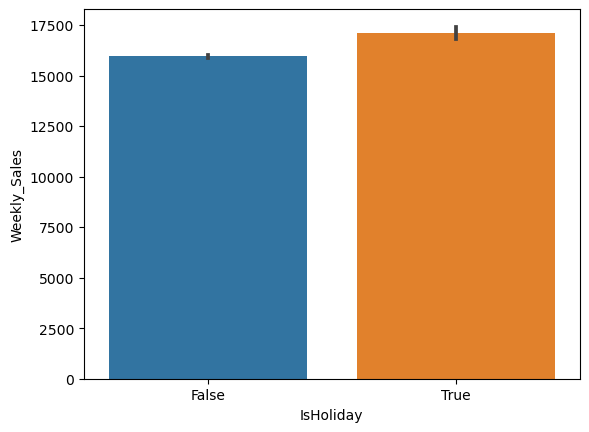

In [13]:
import seaborn as sns
sns.barplot(data=df, x='IsHoliday', y='Weekly_Sales')

<Axes: xlabel='Month', ylabel='Weekly_Sales'>

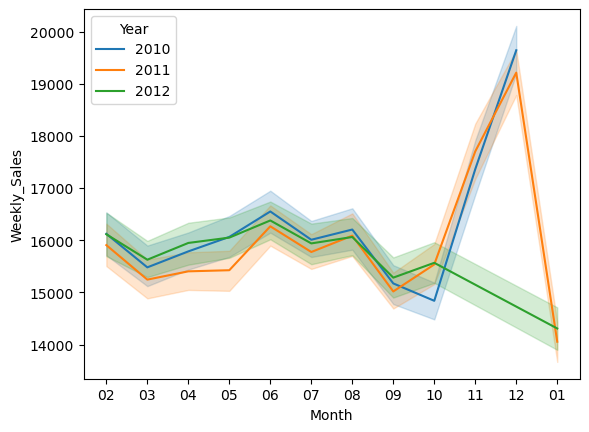

In [14]:
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.strftime('%m')
df['Year'] = df['Date'].dt.strftime('%Y')
df['MY'] = df['Date'].dt.strftime('%Y-%m')
sns.lineplot(data=df, x='Month', y='Weekly_Sales', hue='Year')

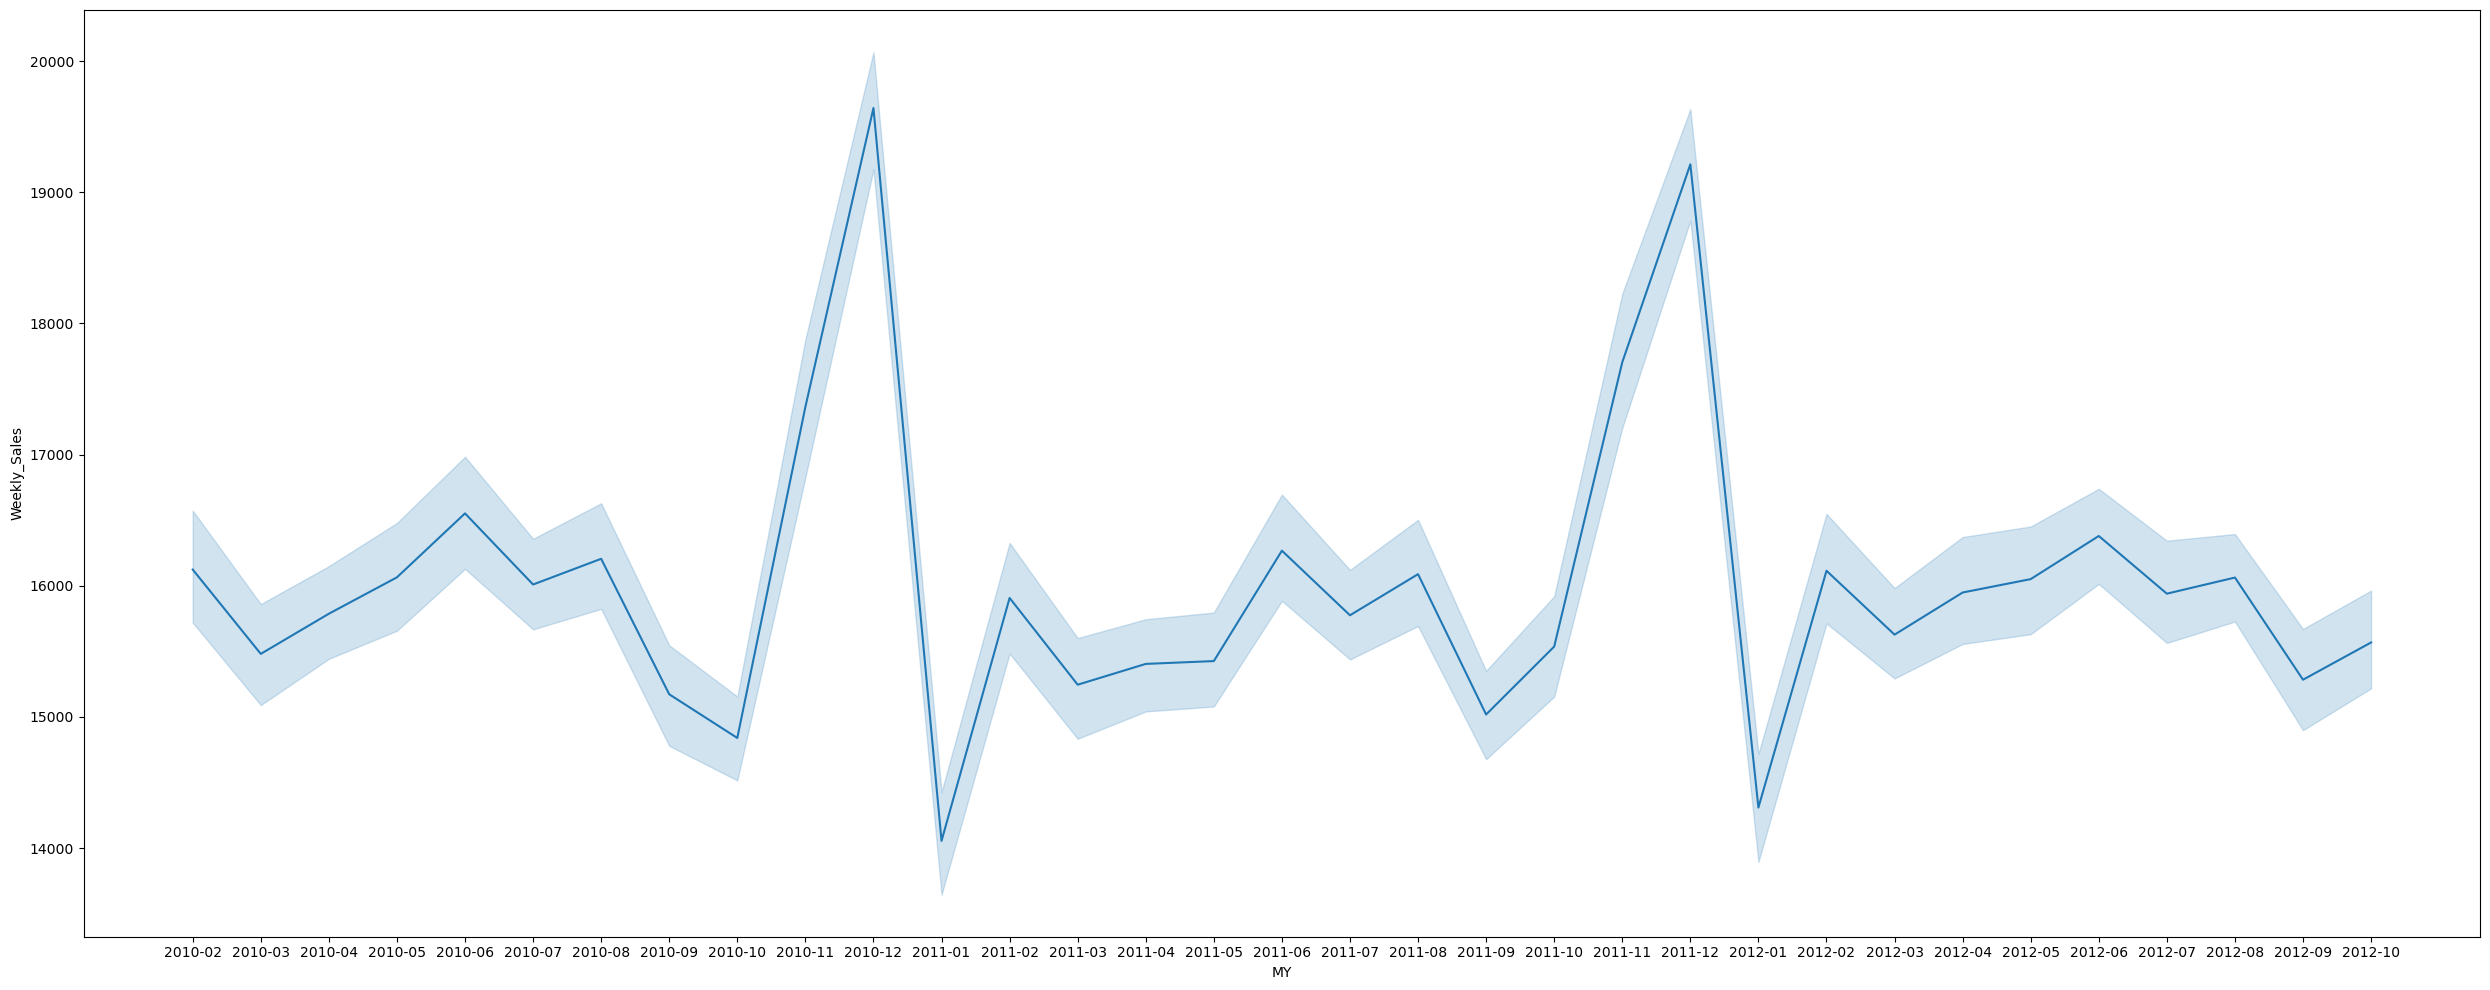

In [15]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(25, 10))
sns.lineplot(data=df, x='MY', y='Weekly_Sales')
plt.tight_layout()

<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


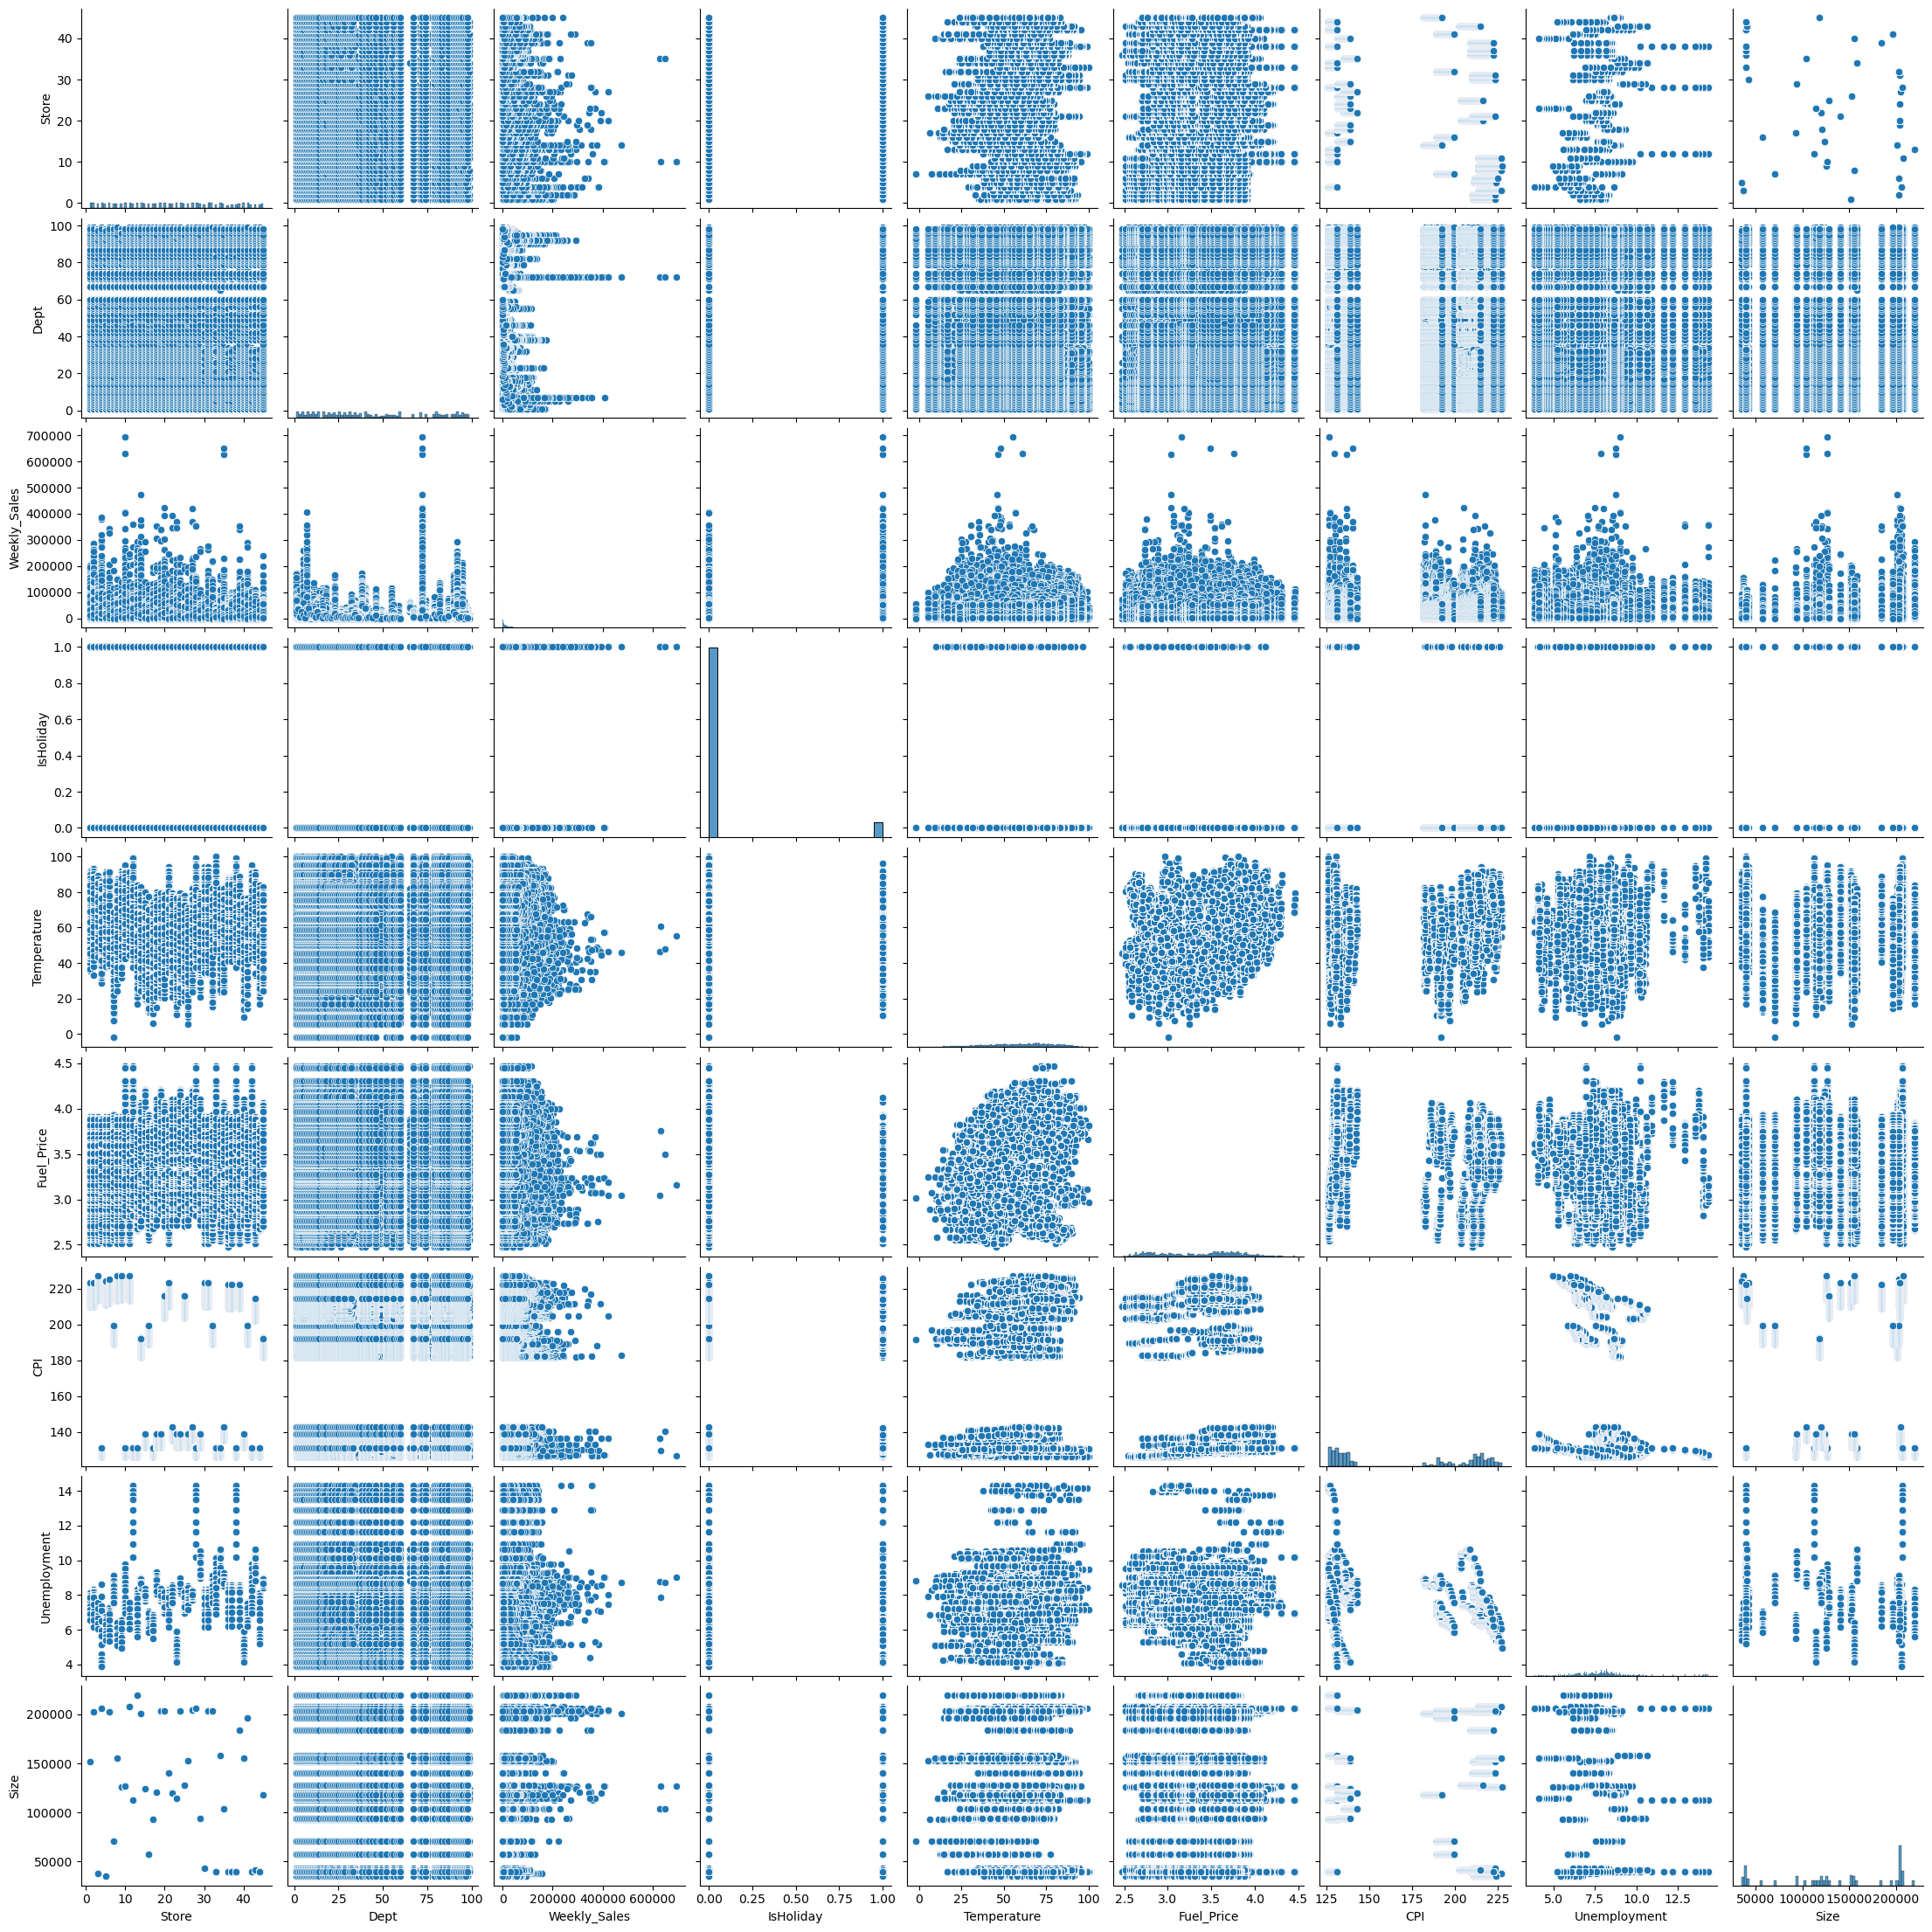

In [16]:
sns.pairplot(data=df)

C:\Users\VICTUS\AppData\Local\Temp\ipykernel_21680\3554909551.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap='coolwarm')    # To see the correlations


<Axes: >

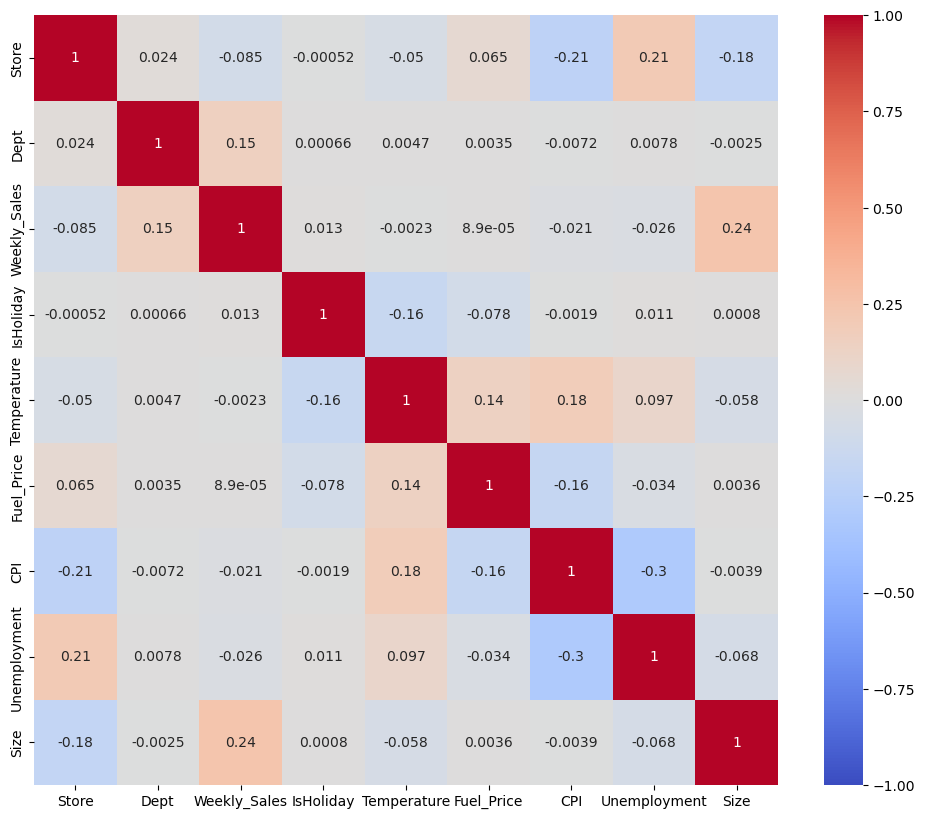

In [17]:
plt.figure(figsize = (12,10))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap='coolwarm')    # To see the correlations

- Year 2010 has higher sales than 2011 and 2012. But, November and December sales are not in the data for 2012.
- CPI, temperature, unemployment rate and fuel price have no pattern on weekly sales.
- Nov and Dec sales are higher as compared to other months

## Data Prep

In [13]:
df1 = df[['Dept', 'Date', 'Weekly_Sales', 'Size']]
df1.head()

,Dept,Date,Weekly_Sales,Size
0,1,2010-02-05,24924.50,151315
1,2,2010-02-05,50605.27,151315
2,3,2010-02-05,13740.12,151315
3,4,2010-02-05,39954.04,151315
4,5,2010-02-05,32229.38,151315


In [14]:
df1.isnull().sum()

Dept            0
Date            0
Weekly_Sales    0
Size            0
dtype: int64

In [16]:
df1 = df1.groupby(by='Date', as_index=False).sum()
df1.head()

,Date,Dept,Weekly_Sales,Size
0,2010-02-05,130099,49750875.98,404726444
1,2010-02-12,130734,48336800.10,406003811
2,2010-02-19,131534,48277902.33,407715096
3,2010-02-26,129533,43970440.65,403855974
4,2010-03-05,129242,46872715.16,403865218


In [17]:
df1.shape

(143, 4)

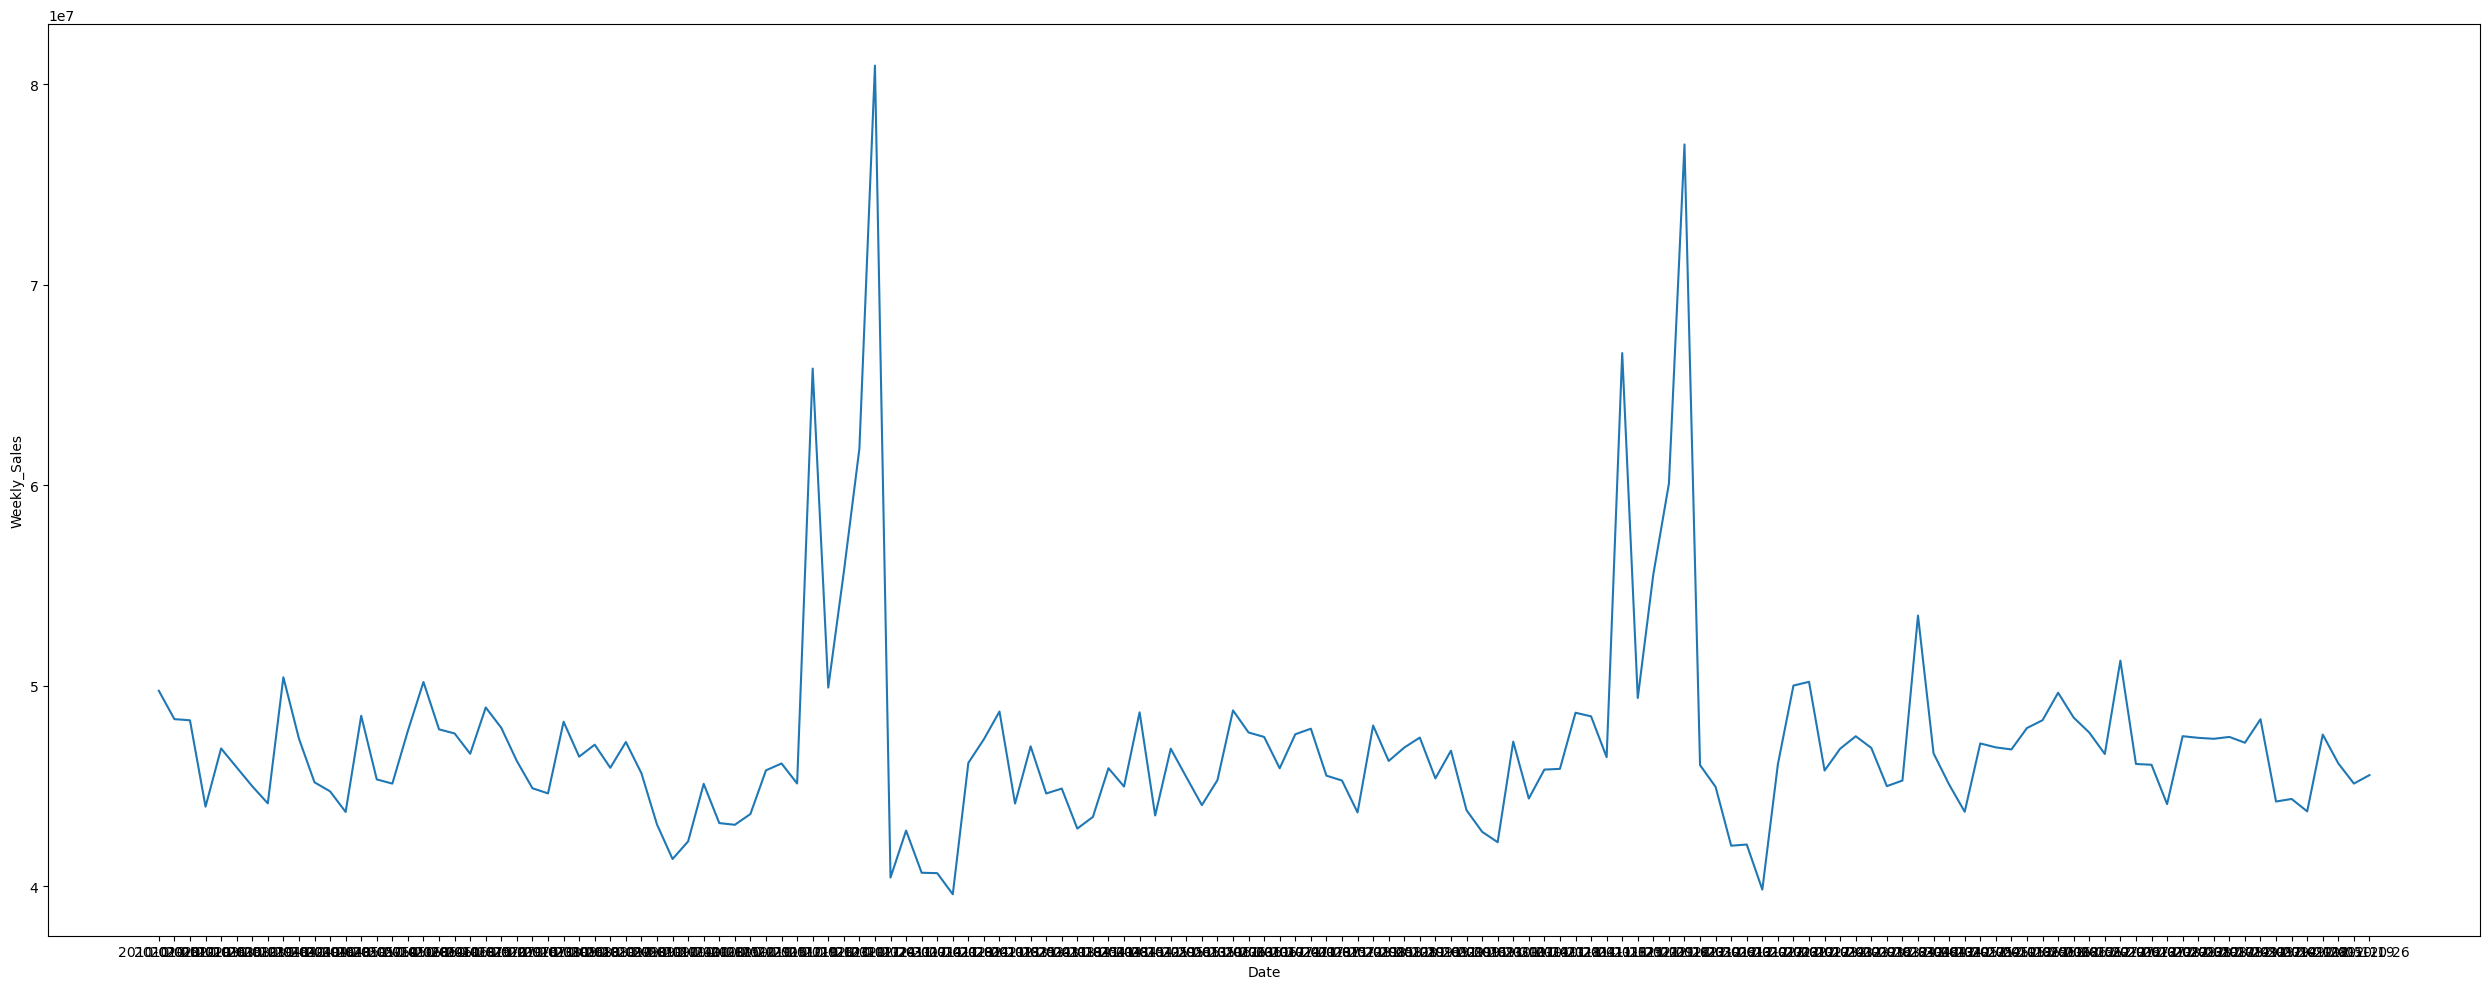

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(figsize=(25, 10))
sns.lineplot(data=df1, x='Date', y='Weekly_Sales')
plt.tight_layout()

In [21]:
###groupbying For Stationarity
from statsmodels.tsa.stattools import adfuller

#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
        
adfuller_test(df1['Weekly_Sales'])

ADF Test Statistic : -5.908397717797433
p-value : 2.674606788825844e-07
#Lags Used : 4
Number of Observations Used : 138
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


## Differencing

In [ ]:
df1['Sales'] = df1['Weekly_Sales'] - df1['Weekly_Sales'].shift(1)

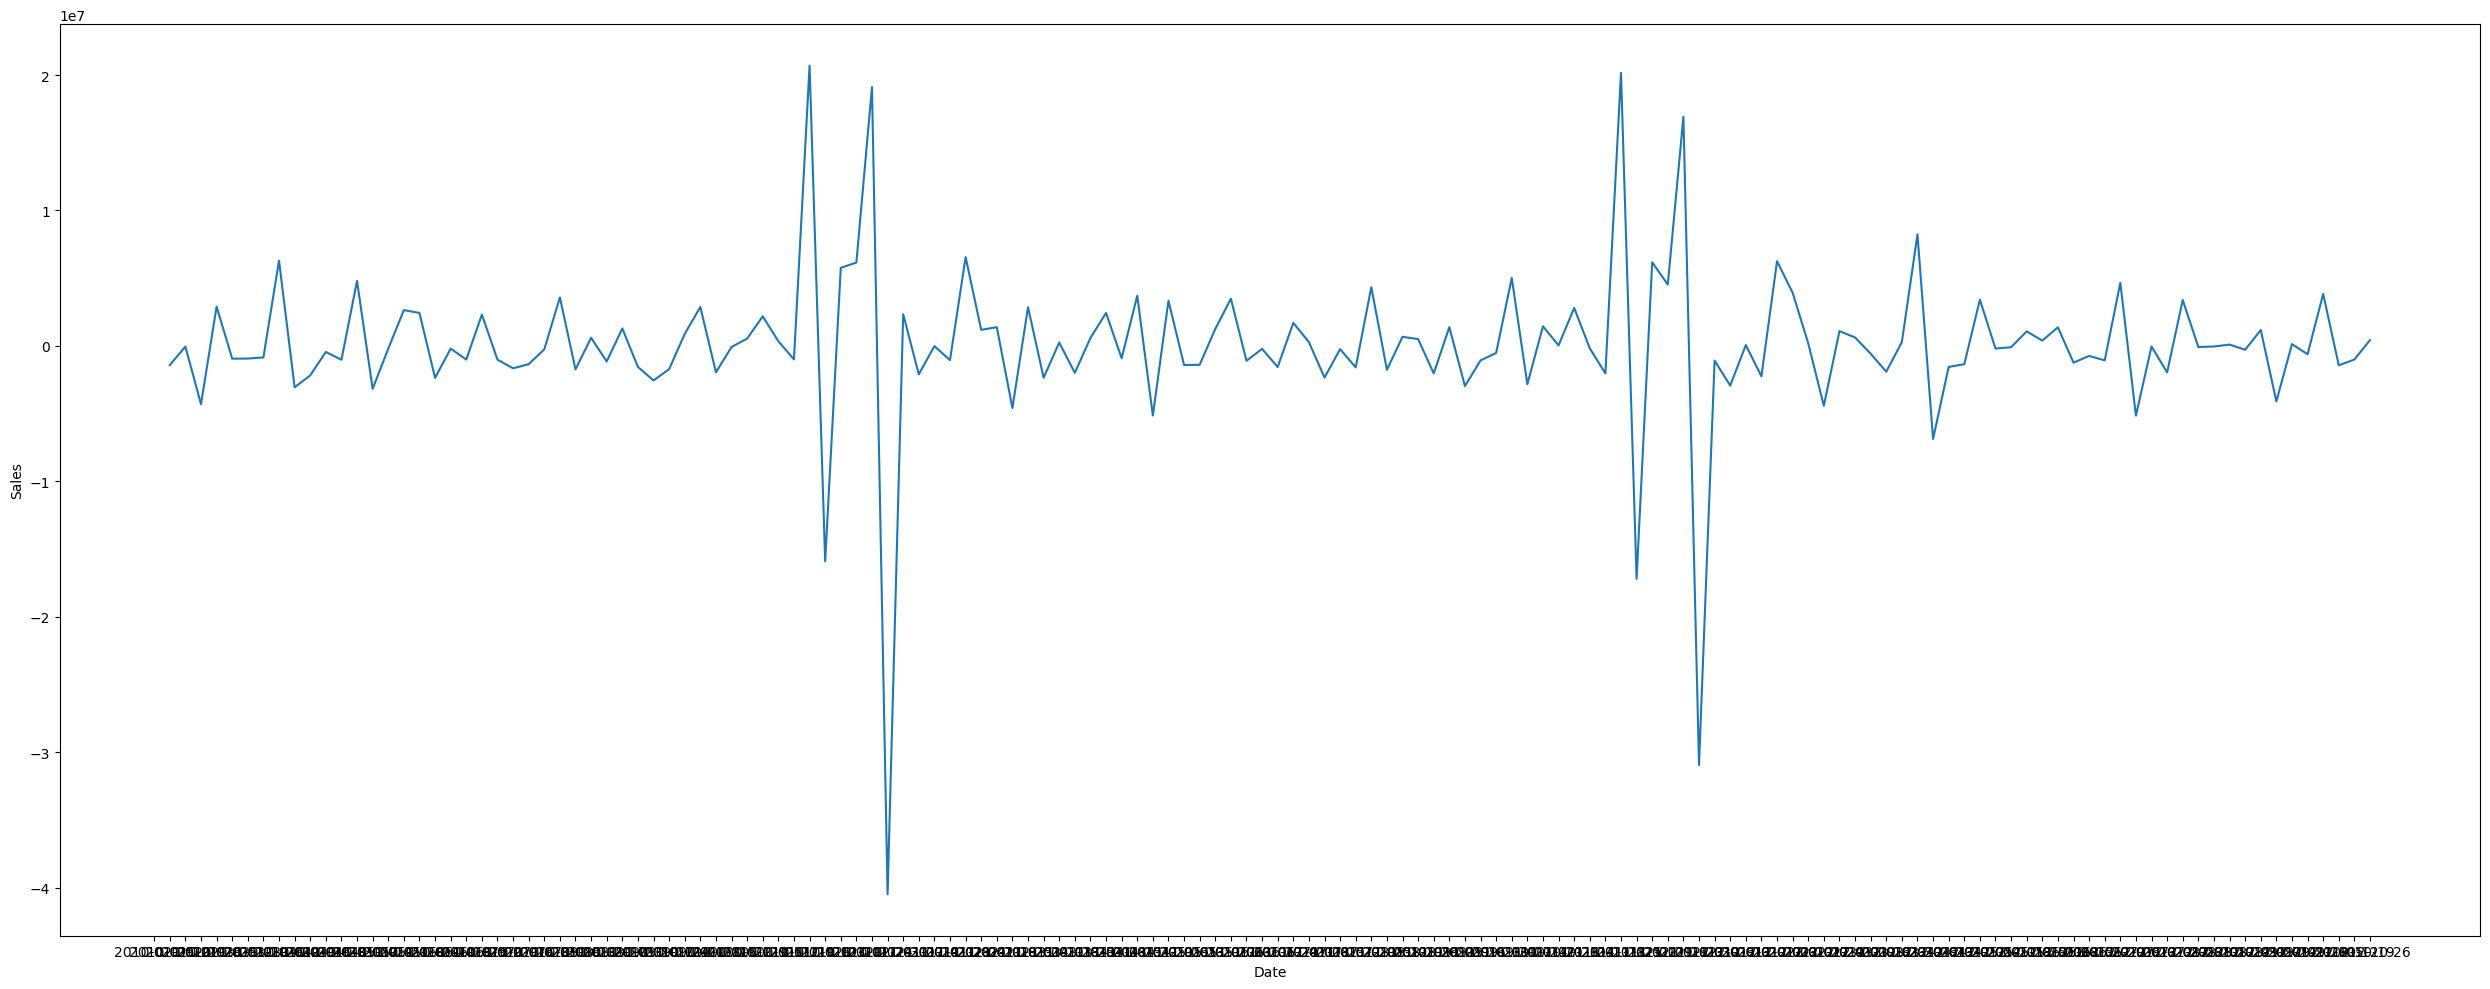

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(figsize=(25, 10))
sns.lineplot(data=df1, x='Date', y='Sales')
plt.tight_layout()

In [29]:
adfuller_test(df1['Sales'].dropna())

ADF Test Statistic : -6.69952805865287
p-value : 3.9213088895704494e-09
#Lags Used : 7
Number of Observations Used : 134
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


## AutoRegressive Model

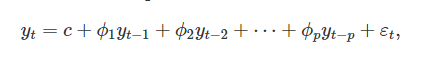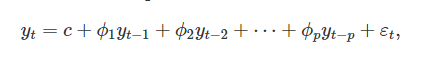

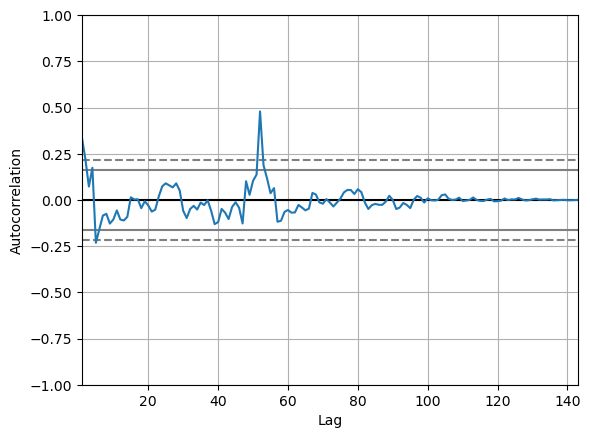

In [32]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df1['Weekly_Sales'])
plt.show()

## Final Thoughts on Autocorrelation and Partial Autocorrelation
- Identification of an AR model is often best done with the PACF.
    * For an AR model, the theoretical PACF “shuts off” past the order of the model. The phrase “shuts off” means that in theory the partial autocorrelations are equal to 0 beyond that point. Put another way, the number of non-zero partial autocorrelations gives the order of the AR model. By the “order of the model” we mean the most extreme lag of x that is used as a predictor.
    
- Identification of an MA model is often best done with the ACF rather than the PACF.
    * For an MA model, the theoretical PACF does not shut off, but instead tapers toward 0 in some manner. A clearer pattern for an MA model is in the ACF. The ACF will have non-zero autocorrelations only at lags involved in the model.

- (p,d,q) 
  * p AR model lags 
  * d differencing
  * q MA lags

C:\Users\VICTUS\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


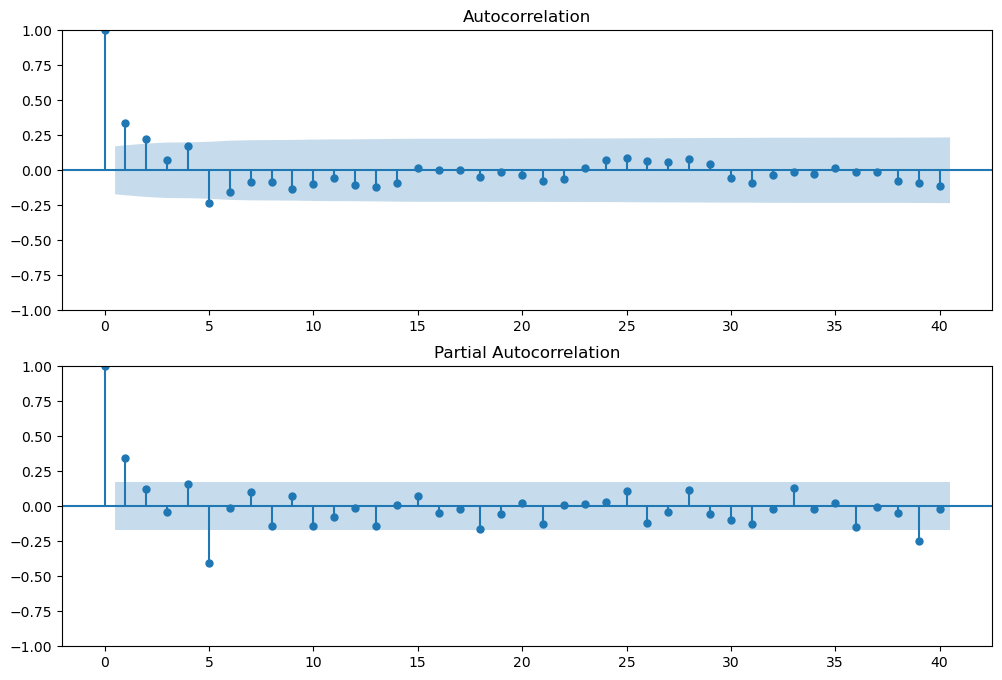

In [35]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(df['Weekly_Sales'].iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(df['Weekly_Sales'].iloc[13:],lags=40,ax=ax2)

C:\Users\VICTUS\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\VICTUS\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


<Axes: >

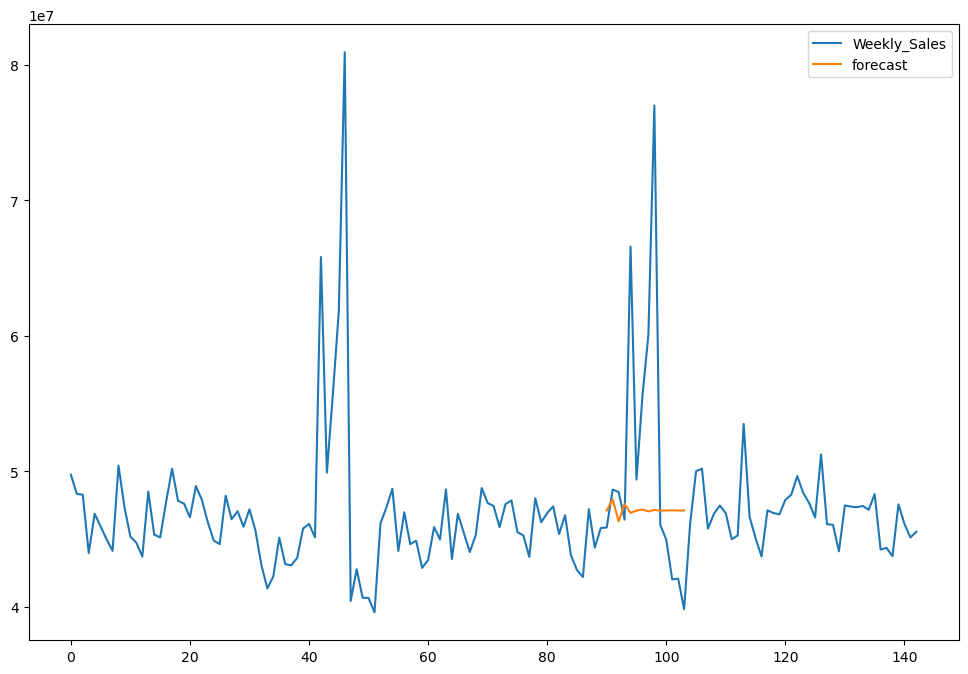

In [40]:
from statsmodels.tsa.arima.model import ARIMA

model=ARIMA(df['Weekly_Sales'],order=(2,0,2))
model_fit=model.fit()

df['forecast']=model_fit.predict(start=90,end=103,dynamic=True)
df[['Weekly_Sales','forecast']].plot(figsize=(12,8))

C:\Users\VICTUS\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


<Axes: >

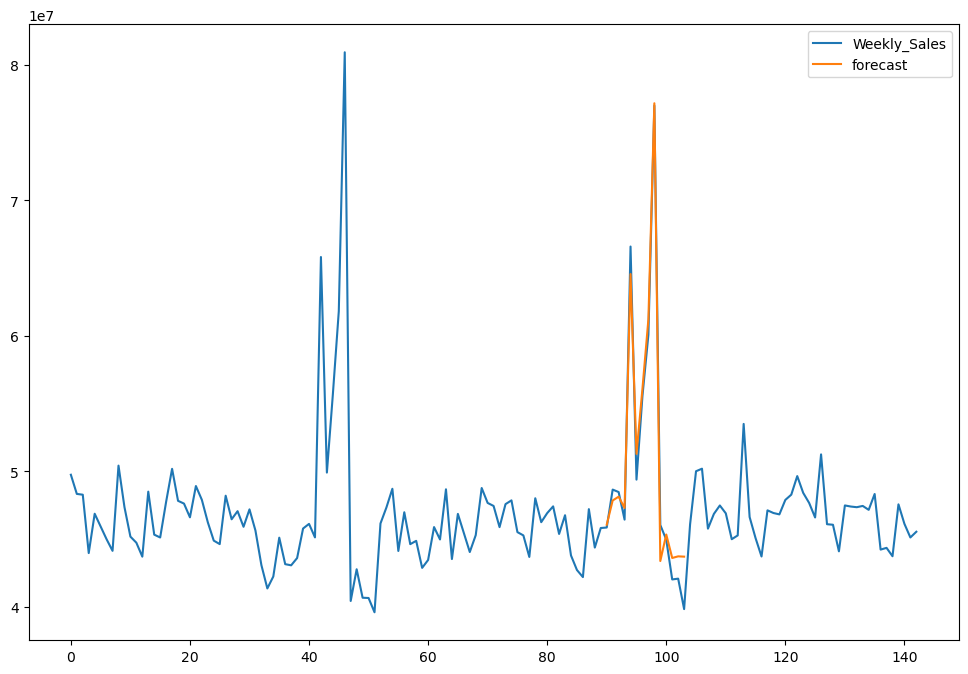

In [42]:
import statsmodels.api as sm

model=sm.tsa.statespace.SARIMAX(df['Weekly_Sales'],order=(1, 1, 1),seasonal_order=(1,1,1,52))
results=model.fit()

df['forecast']=results.predict(start=90,end=103,dynamic=True)
df[['Weekly_Sales','forecast']].plot(figsize=(12,8))

In [61]:
df1['Date'] = pd.to_datetime(df1['Date'])

In [63]:
df1['Date'].iloc[-1]

Timestamp('2012-10-26 00:00:00')

In [64]:
from pandas.tseries.offsets import DateOffset
future_dates=[df1['Date'].iloc[-1] + DateOffset(weeks=x)for x in range(0,24)]

In [68]:
future_datest_df = pd.DataFrame(columns=df.columns)
future_datest_df['Date'] = future_dates
future_datest_df.head()

,Date,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Size,forecast
0,2012-10-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2012-11-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2012-11-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2012-11-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2012-11-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [70]:
future_df = pd.concat([df1, future_datest_df])
future_df.tail()

,Date,Dept,Weekly_Sales,Size,Sales,Store,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,forecast
19,2013-03-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20,2013-03-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21,2013-03-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22,2013-03-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23,2013-04-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: >

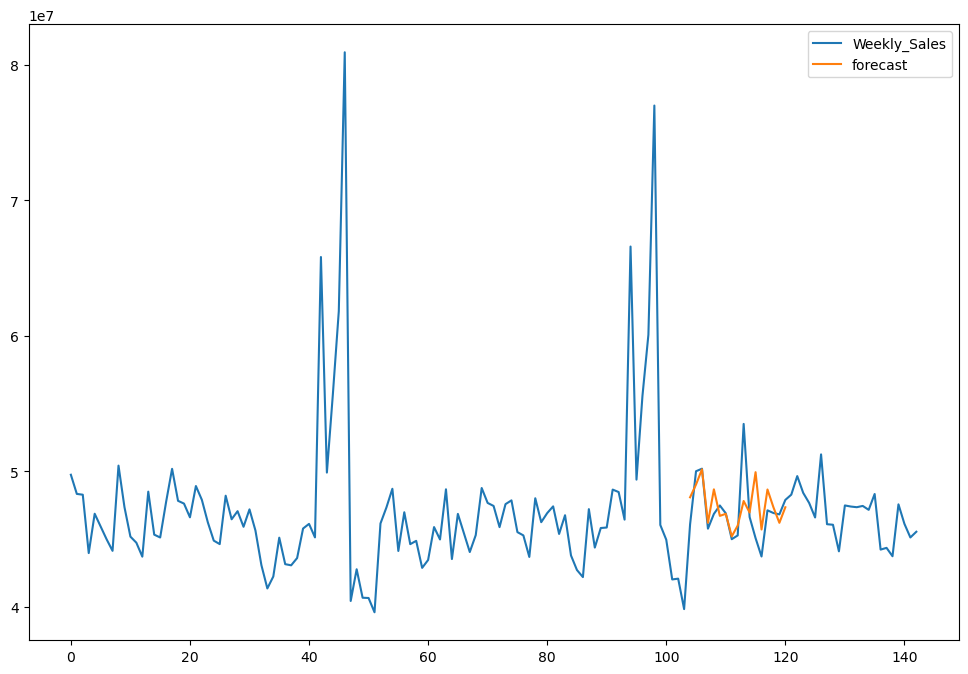

In [71]:
future_df['forecast'] = results.predict(start = 104, end = 120, dynamic= True)  
future_df[['Weekly_Sales', 'forecast']].plot(figsize=(12, 8)) 